# Using Python

In this notebook, we are going to look at some uses of Python, and we are going to start with complete and simi-complete problems, where we'll start to fill in the blanks. Don't expect to have every packages explained; we'll come back to othem later.

## Objectives

* See some simple problems solved in Python.
* Start manipulating Python expressions to modify the execution

Most Python programs and notebook start with imports for the libraries (also called modules or packages) that they need. We'll discuss these in a later lesson.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## Example 1: Approxomating the sin function

Let's attempt to plot approxomations of the sin function. We'll start by implementing the `apsin` function with the formula:

$$
\sin(x) \approx \sum_{n=0} \frac{(-1)^{n}}{ (2n + 1)! x^{2n+1}} 
$$

In [15]:
def apsin(x, N):
    t = s = x
    for n in range(2, N):
        t = - t * x**2/((2*n-1)*(2*n-2))
        s = s + t
    return s

In [27]:
# Make a set of x values n (default 100)
xs = np.linspace(0, 2*np.pi)
xs

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

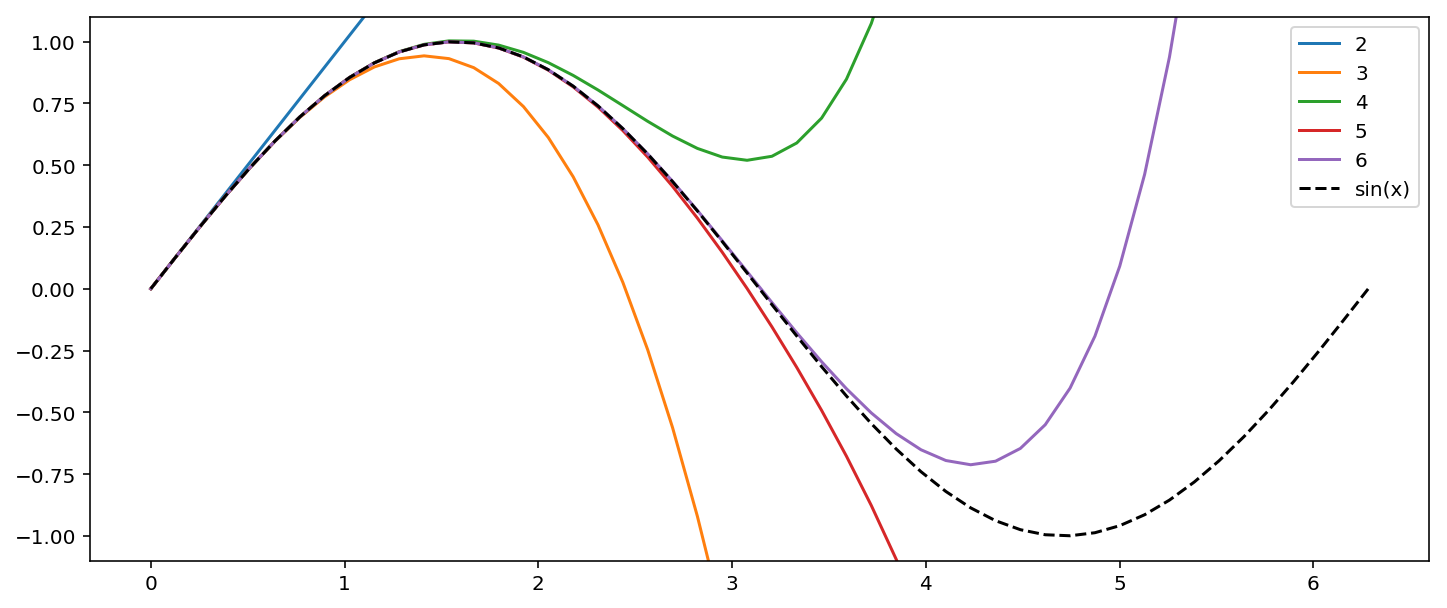

In [58]:
# Make a new figure
plt.figure(figsize=(12,5))

for N in range(2,7):
    plt.plot(xs, apsin(xs, N), label=str(N));

# Plot true values
plt.plot(xs, np.sin(xs), 'k--', label='sin(x)')

# Keep the y limits somewhat reasonable
plt.ylim(-1.1, 1.1)

# Show a legend with existing labels
plt.legend()

### Try it yourself

Edit the above code and try the following things:

* Change the range of $N$ values
* Decrease the number of points (use **Shift-Tab** to see the help for `np.linspace`)

# Example 2: The Mandelbrot set

The next example is a fractal. It is quite simple to construct, but can be quite beautiful. The algorithm is:

Make a grid of complex values. Compute the value

$$
z_{n+1}=z_{n}^{2}+c
$$


While $z_n$ is bounded, save that iteration number.

We start by setting up the data:

In [183]:
# Size of the grid to evaluate on
size = (500, 500)

# We need to make a grid where values x = real and y = imag
x, y = np.meshgrid(np.linspace(-2, 2, size[0]), np.linspace(-2, 2, size[1]))
# We could also write: x, y = np.mgrid[-2:2:100j, -2:2:100j]
c = x + y*1j

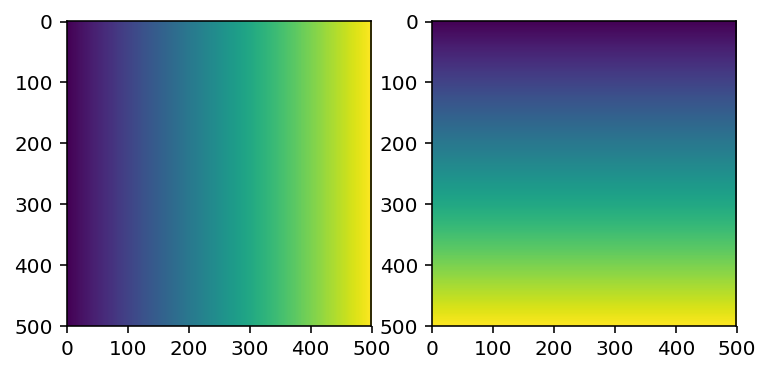

In [184]:
# Verify that we have correctly constructed the real and imaginary parts
fig, axs = plt.subplots(1, 2)
axs[0].imshow(c.real)
axs[1].imshow(c.imag);

In [193]:
z = np.zeros(size, dtype=np.complex)
it_matrix = np.zeros(size, dtype=np.int)
for n in range(30):
    z = z**2 + c
    it_matrix[np.abs(z) < 2] = n

/Users/henryiii/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in absolute
/Users/henryiii/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in square
/Users/henryiii/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in square
/Users/henryiii/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less


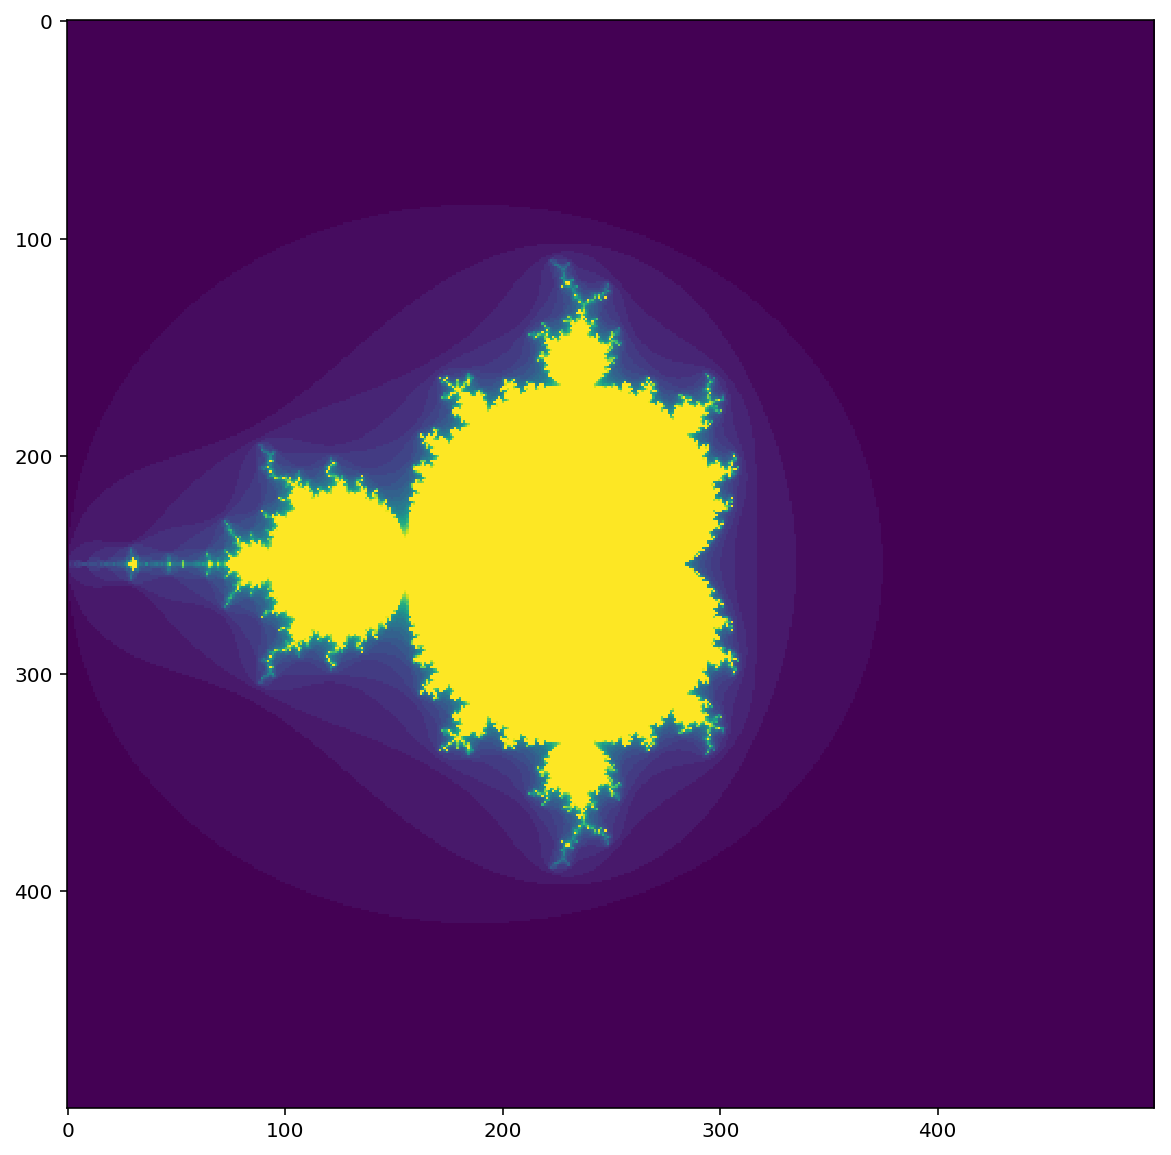

In [194]:
plt.figure(figsize=(10,10))
plt.imshow(it_matrix)

### Continiously colored version

Let's rewrite this to continiously color the figure by the value when it diverged. We'll also be a bit more clever about avoiding warnings from numpy.

In [200]:
z = np.zeros(size, dtype=np.complex)
it_matrix = np.zeros(size, dtype=np.double)
for n in range(50):
    z[it_matrix == 0] = z[it_matrix == 0]**2 + c[it_matrix == 0]
    filt = (it_matrix == 0) & (np.abs(z) > 2)
    it_matrix[filt] =  n + 1 - np.log(np.log(np.abs(z[filt])))/np.log(2)

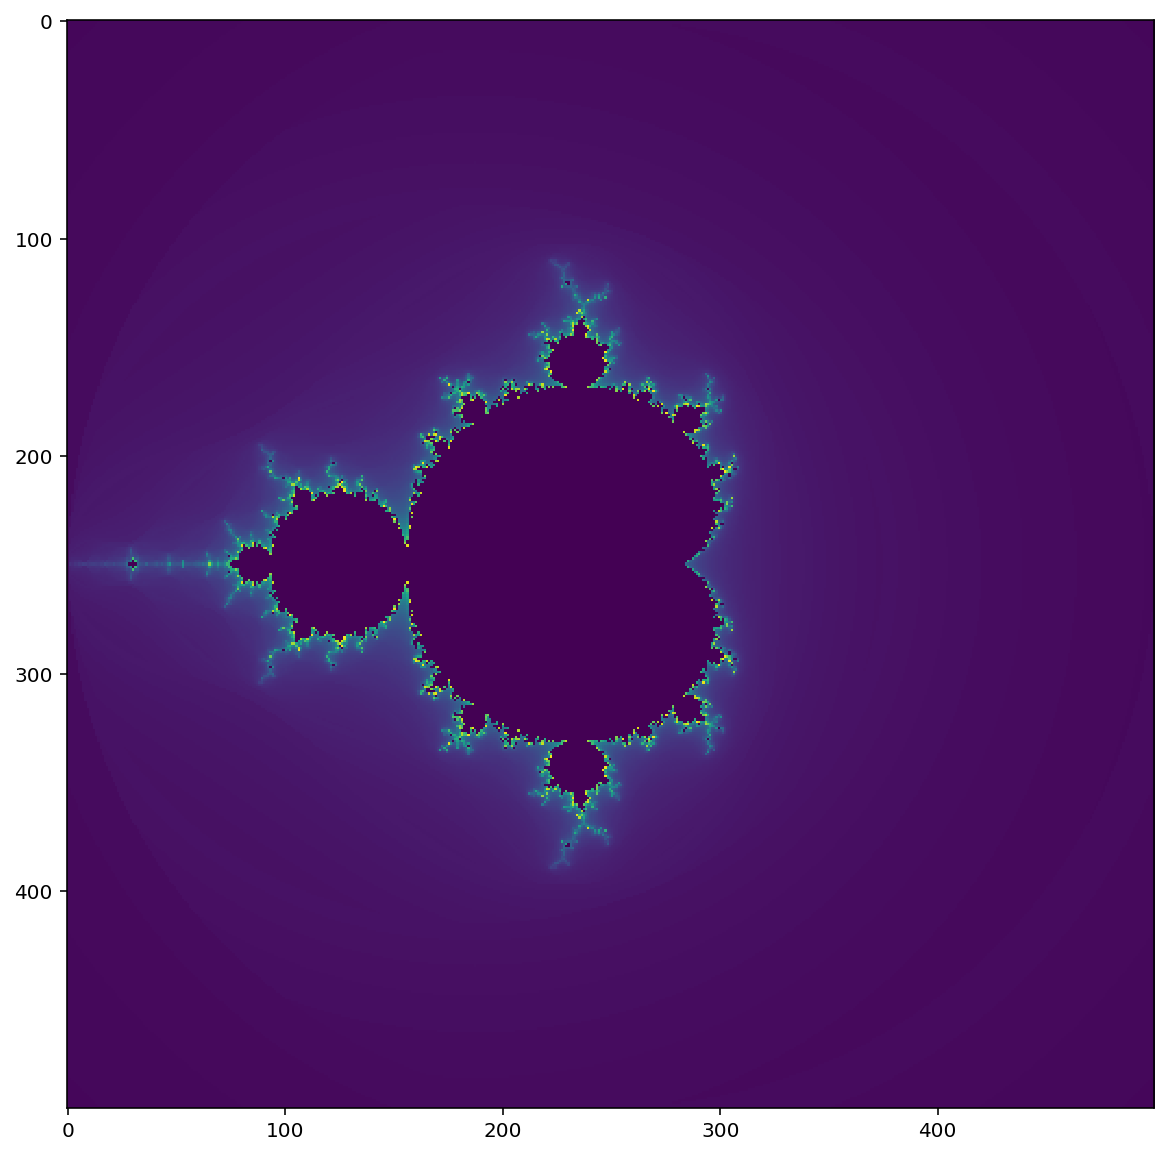

In [201]:
plt.figure(figsize=(10,10))
plt.imshow(it_matrix)

### Try it yourself:

* Put together a function that computes the mandelbrot set. Make at least the size a default parameter.
* Adjust parameters to see the effect


See also https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en
for way too many ways to do mandelbrots in Python, along with performance measurements.